In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as stats
import warnings
warnings.filterwarnings('ignore')
print('setup com')

setup com


In [2]:
df=pd.read_excel('/kaggle/input/cars-dataset/cars dataset.xlsx')
df.sample(3)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
127,Ford,Focus ZX5 5dr,Sedan,USA,Front,15580.0,14607.0,2.0,4.0,130.0,26.0,33.0,2691.0,103.0,168.0
183,Infiniti,G35 4dr,Sedan,Asia,Rear,28495.0,26157.0,3.5,6.0,260.0,18.0,26.0,3336.0,112.0,187.0
381,Toyota,Land Cruiser,SUV,Asia,All,54765.0,47986.0,4.7,8.0,325.0,13.0,17.0,5390.0,112.0,193.0


In [3]:
df.shape

(432, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    float64
 6   Invoice      428 non-null    float64
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    float64
 10  MPG_City     428 non-null    float64
 11  MPG_Highway  428 non-null    float64
 12  Weight       428 non-null    float64
 13  Wheelbase    428 non-null    float64
 14  Length       428 non-null    float64
dtypes: float64(10), object(5)
memory usage: 50.8+ KB


In [5]:
df.isnull().sum()

Make           4
Model          4
Type           4
Origin         4
DriveTrain     4
MSRP           4
Invoice        4
EngineSize     4
Cylinders      6
Horsepower     4
MPG_City       4
MPG_Highway    4
Weight         4
Wheelbase      4
Length         4
dtype: int64

In [6]:
df['MSRP'].fillna(df['MSRP'].mean(), inplace=True)
df['Invoice'].fillna(df['Invoice'].mean(), inplace=True)
df['Cylinders'].fillna(df['Cylinders'].mean(), inplace=True)
df['EngineSize'].fillna(df['EngineSize'].mean(), inplace=True)
df['Horsepower'].fillna(df['Horsepower'].mean(), inplace=True)
df['MPG_City'].fillna(df['MPG_City'].mean(), inplace=True)
df['MPG_Highway'].fillna(df['MPG_Highway'].mean(), inplace=True)
df['Weight'].fillna(df['Weight'].mean(), inplace=True)
df['Wheelbase'].fillna(df['Wheelbase'].mean(), inplace=True)
df['Length'].fillna(df['Length'].mean(), inplace=True)

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [9]:
df.shape

(428, 15)

In [10]:
# Select numerical columns
numerical_cols = [cname for cname in df.columns if 
                df[cname].dtype in ['int64', 'float64']]
# Select numerical columns
categorical_cols = [cname for cname in df.columns if 
                df[cname].dtype in ['object']]
print('numerical columns are',numerical_cols)
print('cateogrical coliumns are',categorical_cols)

numerical columns are ['MSRP', 'Invoice', 'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway', 'Weight', 'Wheelbase', 'Length']
cateogrical coliumns are ['Make', 'Model', 'Type', 'Origin', 'DriveTrain']


# Uni-variate analysis
### 1. Numerical columns analysis

In [11]:
#get statistic summary for numerical cols
round(df.describe(),1)

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.0,428.0,428.0,428.0,428.0,428.0,428.0,428.0,428.0,428.0
mean,32774.9,30014.7,3.2,5.8,215.9,20.1,26.8,3578.0,108.2,186.4
std,19431.7,17642.1,1.1,1.6,71.8,5.2,5.7,759.0,8.3,14.4
min,10280.0,9875.0,1.3,3.0,73.0,10.0,12.0,1850.0,89.0,143.0
25%,20334.2,18866.0,2.4,4.0,165.0,17.0,24.0,3104.0,103.0,178.0
50%,27635.0,25294.5,3.0,6.0,210.0,19.0,26.0,3474.5,107.0,187.0
75%,39205.0,35710.2,3.9,6.0,255.0,21.2,29.0,3977.8,112.0,194.0
max,192465.0,173560.0,8.3,12.0,500.0,60.0,66.0,7190.0,144.0,238.0


#### get data distribution for numerical cols


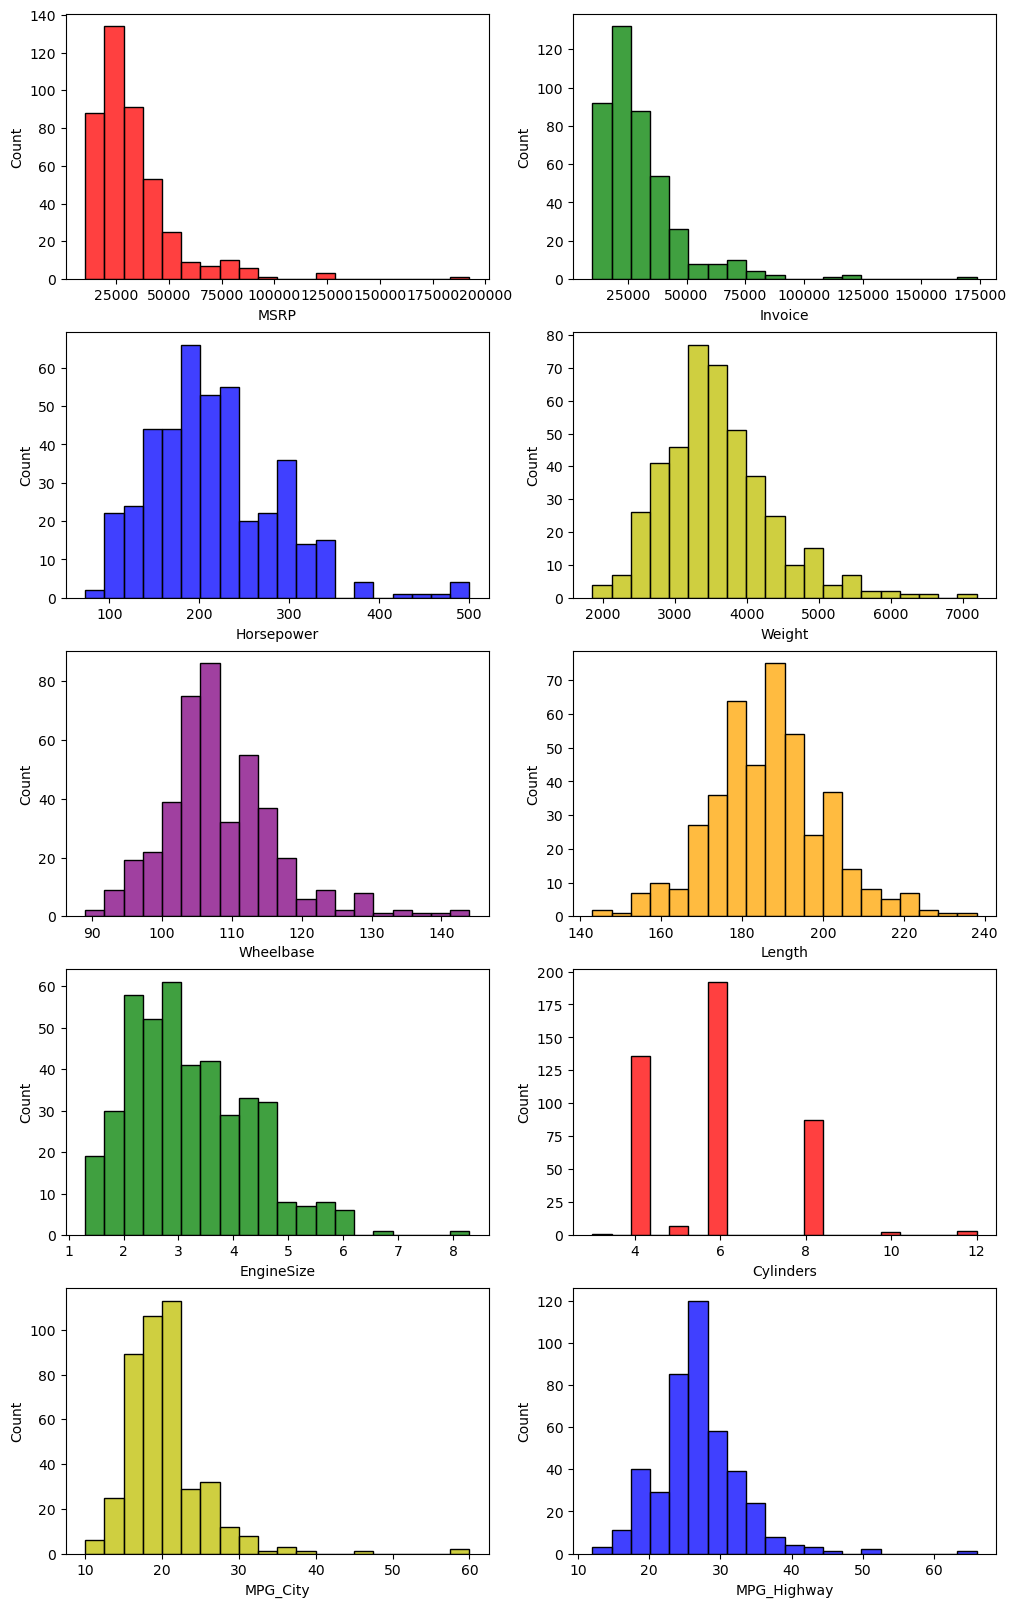

In [15]:
plt.rcParams['figure.figsize'] = (12, 20)
fig, axes = plt.subplots(5, 2)
sns.histplot(df, x='MSRP', color="red",bins=20, ax=axes[0,0])
sns.histplot(df, x="Invoice", color="green",bins=20, ax=axes[0,1])
sns.histplot(df, x="Horsepower", color="b",bins=20, ax=axes[1,0])
sns.histplot(df, x="Weight", color="y",bins=20, ax=axes[1,1])
sns.histplot(df, x="Wheelbase", color='purple',bins=20, ax=axes[2,0])
sns.histplot(df, x="Length", color="orange",bins=20, ax=axes[2,1])
sns.histplot(df, x="EngineSize", color="g",bins=20, ax=axes[3,0])
sns.histplot(df, x="Cylinders", color="r",bins=20, ax=axes[3,1])
sns.histplot(df, x="MPG_City", color="y",bins=20, ax=axes[4,0])
sns.histplot(df, x="MPG_Highway", color="b",bins=20, ax=axes[4,1])

plt.show()

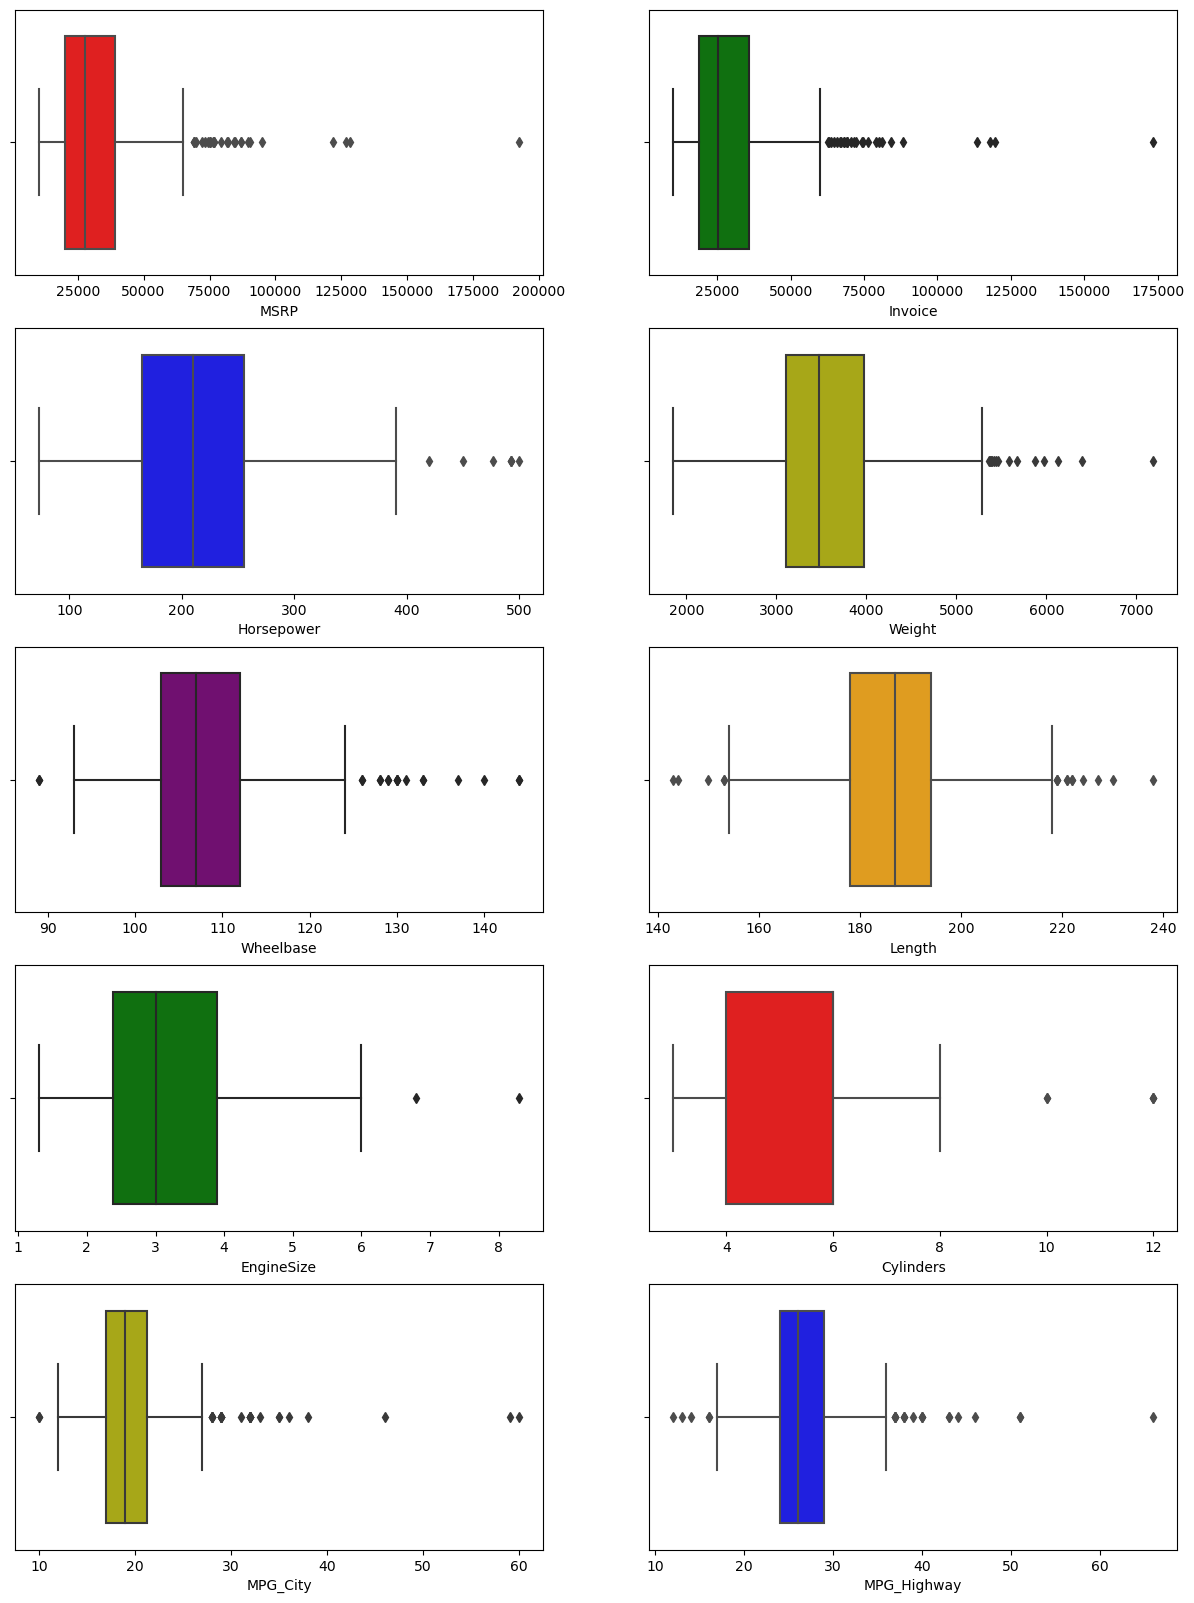

In [30]:
plt.rcParams['figure.figsize'] = (15, 20)
fig, axes = plt.subplots(5, 2)
sns.boxplot(df, x='MSRP', color="red",ax=axes[0,0])
sns.boxplot(df, x="Invoice", color="green", ax=axes[0,1])
sns.boxplot(df, x="Horsepower", color="b", ax=axes[1,0])
sns.boxplot(df, x="Weight", color="y", ax=axes[1,1])
sns.boxplot(df, x="Wheelbase", color='purple', ax=axes[2,0])
sns.boxplot(df, x="Length", color="orange", ax=axes[2,1])
sns.boxplot(df, x="EngineSize", color="g", ax=axes[3,0])
sns.boxplot(df, x="Cylinders", color="r", ax=axes[3,1])
sns.boxplot(df, x="MPG_City", color="y", ax=axes[4,0])
sns.boxplot(df, x="MPG_Highway", color="b", ax=axes[4,1])
plt.show()

### 2. Categorical columns analysis

In [16]:
df.sample(1)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
363,Subaru,Outback H-6 VDC 4dr,Sedan,Asia,All,31545.0,28603.0,3.0,6.0,212.0,19.0,26.0,3630.0,104.0,184.0


In [57]:
 #Most cars Make over 10
df.Make.value_counts().loc[lambda x: x>10]

Toyota           28
Chevrolet        27
Mercedes-Benz    26
Ford             23
BMW              20
Audi             19
Honda            17
Nissan           17
Volkswagen       15
Chrysler         15
Dodge            13
Mitsubishi       13
Volvo            12
Jaguar           12
Hyundai          12
Subaru           11
Pontiac          11
Mazda            11
Lexus            11
Kia              11
Name: Make, dtype: int64

<AxesSubplot:ylabel='Make'>

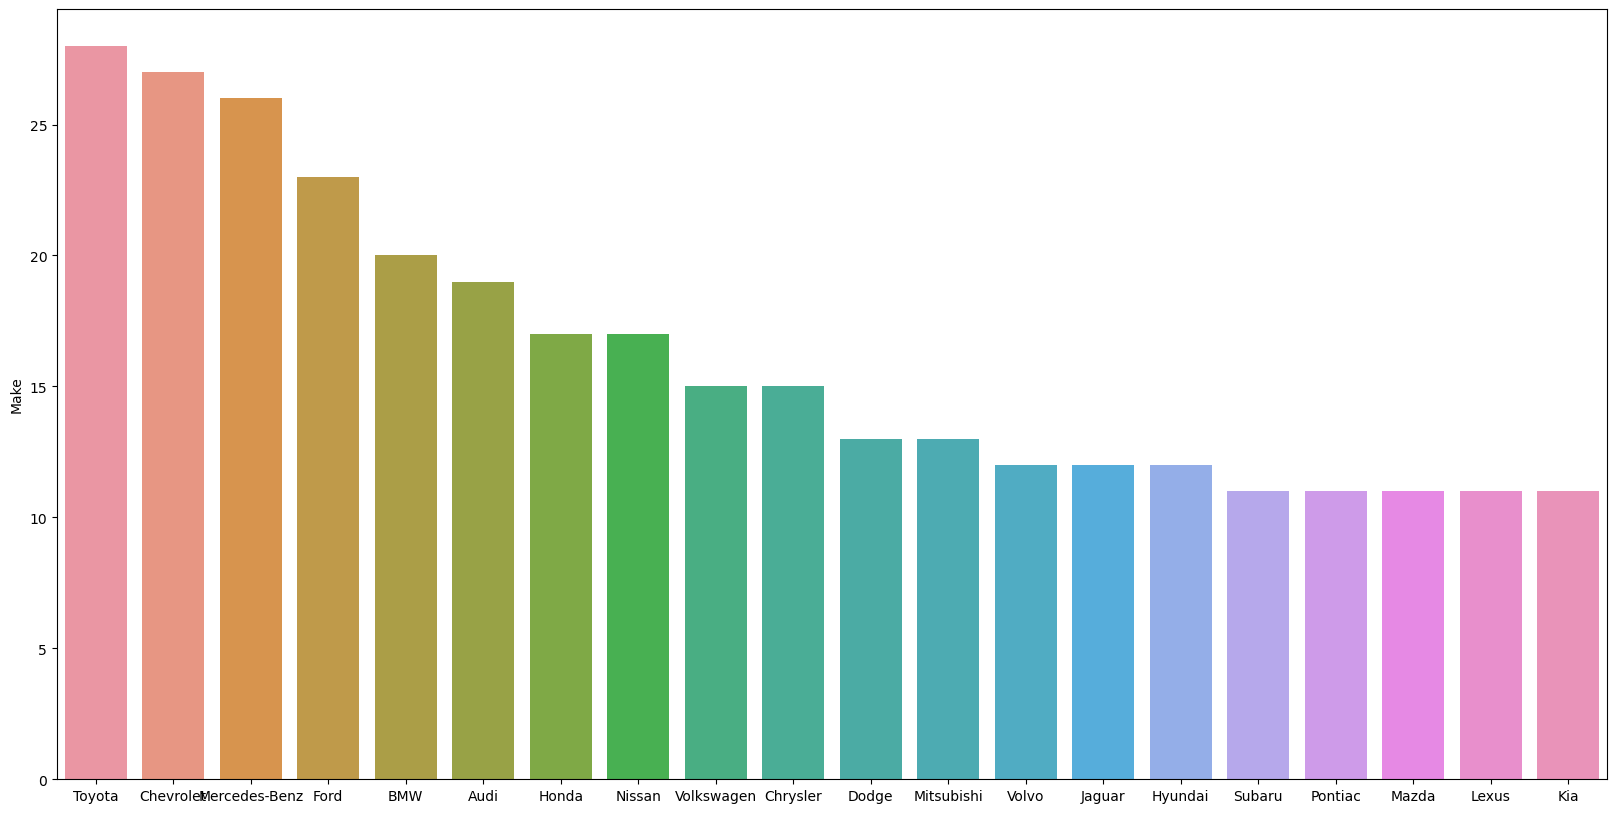

In [61]:
plt.figure(figsize=(20,10))
sns.barplot(x=(df.Make.value_counts().loc[lambda x: x>10]).index,y=df.Make.value_counts().loc[lambda x: x>10], data=df)


In [63]:
#Most car type
df.Type.value_counts()

Sedan     262
SUV        60
Sports     49
Wagon      30
Truck      24
Hybrid      3
Name: Type, dtype: int64

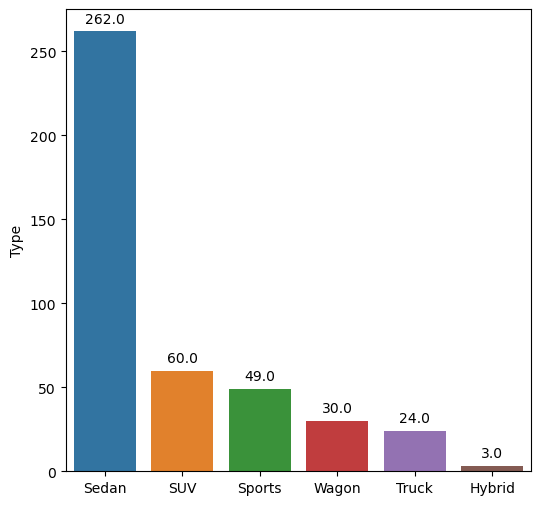

In [78]:
fig, ax = plt.subplots(figsize=(6, 6))
splot=sns.barplot(x=df.Type.value_counts().index,y=df.Type.value_counts(),data=df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

In [81]:
#Most cars origin
df.Origin.value_counts()

Asia      158
USA       147
Europe    123
Name: Origin, dtype: int64

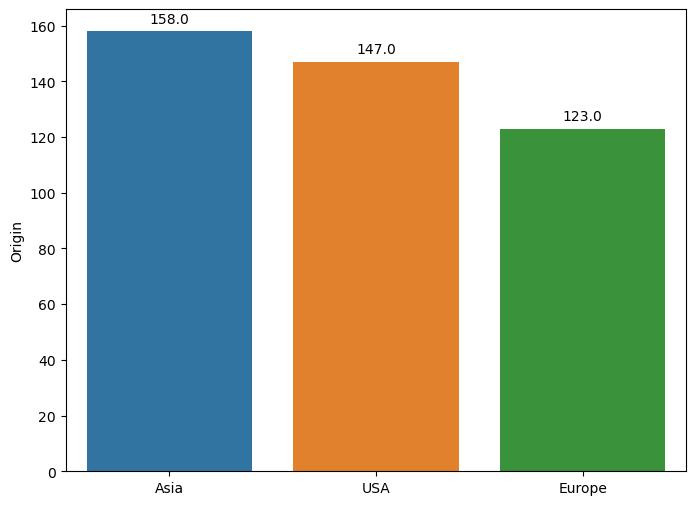

In [85]:
fig, ax = plt.subplots(figsize=(8, 6))
splot=sns.barplot(x=df.Origin.value_counts().index,y=df.Origin.value_counts(),data=df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

In [86]:
#Most cars DriveTrain
df.DriveTrain.value_counts()

Front    226
Rear     110
All       92
Name: DriveTrain, dtype: int64

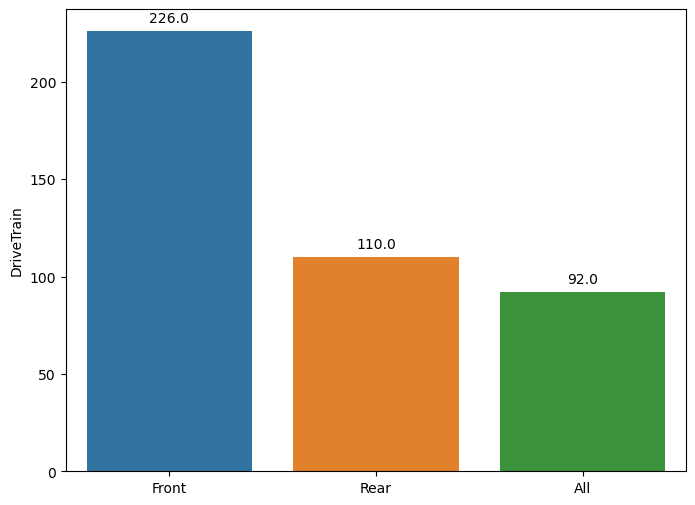

In [89]:
fig, ax = plt.subplots(figsize=(8, 6))
splot=sns.barplot(x=df.DriveTrain.value_counts().index,y=df.DriveTrain.value_counts(),data=df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Bi_Variate analysis

In [90]:
df.sample(1)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
38,BMW,530i 4dr,Sedan,Europe,Rear,44995.0,41170.0,3.0,6.0,225.0,20.0,30.0,3472.0,114.0,191.0


In [95]:
df.groupby('Type').agg({'MSRP': ['min', 'max','sum','mean'],'Invoice':['min','max','sum','mean']})

MSRP                                     Invoice            \
            min       max        sum          mean      min       max   
Type                                                                    
Hybrid  19110.0   20510.0    59760.0  19920.000000  17911.0   18926.0   
SUV     17163.0   76870.0  2087415.0  34790.250000  16949.0   71540.0   
Sedan   10280.0  128420.0  7800688.0  29773.618321   9875.0  119600.0   
Sports  18345.0  192465.0  2615966.0  53387.061224  16943.0  173560.0   
Truck   12800.0   52975.0   598593.0  24941.375000  11879.0   48541.0   
Wagon   11905.0   60670.0   865216.0  28840.533333  11410.0   56474.0   

                                 
              sum          mean  
Type                             
Hybrid    55288.0  18429.333333  
SUV     1897521.0  31625.350000  
Sedan   7176127.0  27389.797710  
Sports  2375185.0  48473.163265  
Truck    542802.0  22616.750000  
Wagon    799369.0  26645.633333

In [98]:
df_corr=df.corr()

<AxesSubplot:>

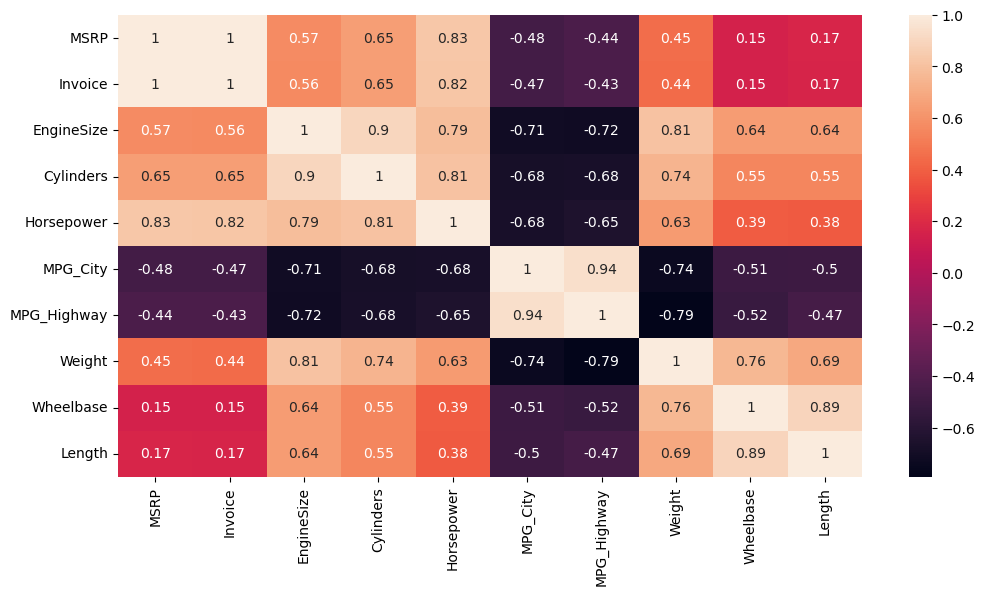

In [101]:
plt.figure(figsize=(12,6))
sns.heatmap(df_corr, annot=True)